# Business Understanding

Gemeente Zwolle wil integraal te werk gaan met de verschillende afdelingen die betrokken zijn met wegen die opengemaakt moeten worden voor onderhoud of aanpassingen. Voor ons is het de taak om dit met de afdelingen groen (bomen), grijs (wegen) en blauw (riool) te coördineren en op basis van de beschikbare data waarde te realiseren naar de gemeente. Als groep gaan wij bezig met het deel blauw waarin onze opdrachtgever graag een model wilt hebben die hem kan assisteren met besluiten maken over onderhoud van het riool, en of dit gecombineerd kan worden met wegonderhoud en of groenonderhoud. Aan ons de taak om op basis van de aangeleverde data een beslismodel te maken voor de stakeholder Gerrit die hem kan assisteren met het bepalen of een riool gereinigd, vervangen of gerepareerd moet worden. Waar mogelijk dienen wij dit te combineren met de andere afdelingen namelijk wegen en groen.  

Als tweede doel wilt Gemeente Zwolle een goede samenwerking tussen de verschillende afdelingen (groen, grijs en blauw) om efficienter te werken. Bijv. een weg open trekken wanneer zowel het riool eronder en de weg zeg aan onderhoud toe zijn. Om zo kort mogelijk een weg af te zetten en geld en tijd te besparen.

Gemeente zwolle hanteert 4 beoordelings aspecten (BDD, BAF, BCC, BAB). De beoodelingsaspecten bevatten een waarde van klasse 1 t/m 5. (klasse 1: geen actie nodig ... klasse 5: hoge nood). 
- BDD: waterdiepte
- BAF: maat van aantasting
- BCC: Kromming in riool
- BAB: Scheuren

## Data Understanding

In [1]:
from simpledbf import Dbf5
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
# Import data
dbf_levensduur = Dbf5('data/Riooldata/Levensduur.dbf')
dbf_riolering = Dbf5('data/Riooldata/Riolering.dbf')
dbf_schades = Dbf5('data/Riooldata/Schades.dbf')

dbf_putten = Dbf5(r'data/riolering april 2022/putten.dbf')
dbf_putten_toekomst = Dbf5(r'data/riolering april 2022/putten-toekomst.dbf')
dbf_strengen = Dbf5(r'data/riolering april 2022/Strengen.dbf')
dbf_strengen_toekomst = Dbf5(r'data/riolering april 2022/Strengen-toekomst.dbf')

In [3]:
# Convert data to dataframes
df_levensduur = dbf_levensduur.to_dataframe()
df_riolering = dbf_riolering.to_dataframe()
df_schades = dbf_schades.to_dataframe()

df_putten = dbf_putten.to_dataframe()
df_putten_toekomst = dbf_putten_toekomst.to_dataframe()
df_strengen = dbf_strengen.to_dataframe()
df_strengen_toekomst = dbf_strengen_toekomst.to_dataframe()

In [4]:
df_levensduur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12988 entries, 0 to 12987
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BEHEEROBJE  12988 non-null  object 
 1   BAB         27 non-null     object 
 2   BAF         4421 non-null   object 
 3   BBC         12438 non-null  object 
 4   BDD         12602 non-null  object 
 5   JAARAANLEG  12988 non-null  int64  
 6   RISICOPROF  12988 non-null  object 
 7   JAARINSPEC  12988 non-null  int64  
 8   STRAATNAAM  12988 non-null  object 
 9   KNOOPPUNT_  12988 non-null  object 
 10  KNOOPPUNT1  12988 non-null  object 
 11  BOB_BEGINK  12988 non-null  float64
 12  BOB_EINDKN  12988 non-null  float64
 13  BREEDTE_DI  12988 non-null  float64
 14  MATERIAAL   12981 non-null  object 
 15  LENGTE      12988 non-null  float64
 16  SHAPE_Leng  12988 non-null  float64
 17  HOOGTE      12988 non-null  float64
 18  VORM        12985 non-null  object 
 19  CATEGORIE   12988 non-nul

In [5]:
df_levensduur.head()

,BEHEEROBJE,BAB,BAF,BBC,BDD,JAARAANLEG,RISICOPROF,JAARINSPEC,STRAATNAAM,KNOOPPUNT_,KNOOPPUNT1,BOB_BEGINK,BOB_EINDKN,BREEDTE_DI,MATERIAAL,LENGTE,SHAPE_Leng,HOOGTE,VORM,CATEGORIE
0,LEI-001-19514,NaN,3,1,4,2009,Hoog,2017,Botlek,20241,12833,-0.85,-0.90,600.0,Beton,14.62,14.616583,0.0,Rond,Gegarandeerd 3 jaar
1,LEI-001-19515,NaN,3,1,4,2009,Hoog,2017,Botlek,20241,12834,-0.85,-0.90,600.0,Beton,14.55,14.554577,0.0,Rond,Gegarandeerd 3 jaar
2,LEI-001-19223,NaN,NaN,1,4,2008,Hoog,2018,Wethouder Alferinkweg,20528,19475,-0.86,-0.86,1250.0,Beton,6.15,6.153251,0.0,Rond,Gegarandeerd 3 jaar
3,LEI-001-12083,NaN,NaN,1,4,2014,Laag,2020,Vestingstraat,19764,19884,0.06,0.11,250.0,Pvc,8.34,8.341013,0.0,Rond,Gegarandeerd 5 jaar
4,LEI-001-18143,NaN,NaN,1,4,2006,Laag,2018,Hofstedestraat,17558,17557,-2.99,-2.96,250.0,Pvc,29.60,29.599394,0.0,Rond,Gegarandeerd 5 jaar


In [6]:
df_riolering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21166 entries, 0 to 21165
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    21166 non-null  int64  
 1   AMBITIENIV  21166 non-null  object 
 2   BEGINDATUM  21117 non-null  object 
 3   EINDDATUM   0 non-null      float64
 4   BEHEEROBJE  21166 non-null  object 
 5   BOB_BEGINK  21166 non-null  float64
 6   BOB_EINDKN  21166 non-null  float64
 7   BREEDTE_DI  21166 non-null  float64
 8   BUURT       797 non-null    object 
 9   EXTRA_INFO  20143 non-null  object 
 10  EXTRA_IN_1  20138 non-null  object 
 11  EXTRA_IN_2  20721 non-null  object 
 12  FUNDERING   21050 non-null  object 
 13  GEGEVENSOO  1098 non-null   object 
 14  GEGEVENS_1  2109 non-null   object 
 15  GEGEVENS_2  2096 non-null   object 
 16  GEOTEXTIEL  0 non-null      float64
 17  GRONDSOORT  20154 non-null  object 
 18  HOOGTE      21166 non-null  float64
 19  KNOOPPUNT_  21166 non-nul

In [7]:
df_riolering.head()

,OBJECTID,AMBITIENIV,BEGINDATUM,EINDDATUM,BEHEEROBJE,BOB_BEGINK,BOB_EINDKN,BREEDTE_DI,BUURT,EXTRA_INFO,...,TOESTAND_1,TOESTAND_2,VERBINDING,VRIJE_BREE,WANDRUWHEI,WEGFUNCTIE,WEGVERHARD,Shape_Leng,STRENGKOPP,STATUS
0,1,basis,1967-01-01,NaN,LEI-001-00054,-0.65,-0.72,400.0,NaN,131,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,31.888677,1,Initieel
1,2,basis,1935-01-02,NaN,LEI-001-00056,-0.14,-0.18,500.0,NaN,113,...,Waarschuwing,Geen bijzonderheden,NaN,22.0,0.0,NaN,NaN,40.956329,2,Initieel
2,3,basis,1935-01-02,NaN,LEI-001-00057,-0.08,-0.10,500.0,NaN,113,...,NaN,NaN,NaN,22.0,0.0,NaN,NaN,41.759197,3,Initieel
3,4,basis,1950-01-01,NaN,LEI-001-00058,-0.32,-0.33,300.0,NaN,121,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,13.757721,4,Initieel
4,5,basis,1901-01-01,NaN,LEI-001-00059,-0.21,-0.25,300.0,NaN,121,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,56.891287,5,Initieel


In [8]:
df_schades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5385 entries, 0 to 5384
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    5385 non-null   int64  
 1   VANNAAR     5385 non-null   object 
 2   INSPDAT     5384 non-null   object 
 3   TYPEINS     5384 non-null   object 
 4   INSPECTEUR  5384 non-null   object 
 5   OPM         5384 non-null   object 
 6   BAB         11 non-null     object 
 7   BAF         866 non-null    object 
 8   BBC         3398 non-null   object 
 9   BDD         3712 non-null   object 
 10  FOTONAAM    4598 non-null   object 
 11  FOTOLINK    0 non-null      float64
 12  BEHEEROBJE  4552 non-null   object 
 13  REL_OBJECT  5385 non-null   int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 589.1+ KB


In [9]:
df_schades.head()

,OBJECTID,VANNAAR,INSPDAT,TYPEINS,INSPECTEUR,OPM,BAB,BAF,BBC,BDD,FOTONAAM,FOTOLINK,BEHEEROBJE,REL_OBJECT
0,18557,12560-12561,2017-06-12,Voor reiniging,J. Borst,"bocht net na put,,",NaN,BAF3 - toeslagstoffen die uitsteken,BBC1 - h <= 5%,BDD1 - h <= 10%,12560-12561.jpg,NaN,LEI-001-00061,7
1,18561,12568-12562,2017-06-12,Voor reiniging,J. Borst,"voertuig op put,Geen Actie,",NaN,NaN,NaN,NaN,12568-12562.jpg,NaN,LEI-001-00063,9
2,18564,12549-12550,2017-06-14,Voor reiniging,J. Borst,"zak in leiding achter put,,",NaN,NaN,BBC1 - h <= 5%,BDD2 - 10% < h <= 25%,12549-12550.jpg,NaN,LEI-001-00065,11
3,18565,12550-12549,2017-06-14,Voor reiniging,J. Borst,"zak in leiding achter put,,",NaN,NaN,BBC1 - h <= 5%,BDD2 - 10% < h <= 25%,12550-12549.jpg,NaN,LEI-001-00065,11
4,18567,10582-10583,2017-09-15,Voor reiniging,Hugo,"wortels, complexe massa, 10-25%,Frezen,Gedetai...",NaN,BAF3 - toeslagstoffen die uitsteken,BBC1 - h <= 5%,BDD1 - h <= 10%,10582-10583-3.jpg,NaN,LEI-001-00008,22


In [29]:
df_putten

,OBJECTID,AMBITIENIV,BEGINDATUM,EINDDATUM,BEHEEROBJE,BINNENONDE,BREEDTE,CENTRALE_V,EXTRA_INFO,EXTRA_IN_1,...,PEILBUISLE,POMPSCHAKE,STROOMGEBI,STRUCTUURG,PERCEELSAA,KOLKAANSLU,BUURT,WOONPLAATS,STRAAT,STRAATCODE
0,100,basis,1800-01-01,NaN,KPT-001-10113,-0.86,800.0,NaN,ja,20040216,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101,basis,1953-01-01,NaN,KPT-001-10114,0.31,600.0,NaN,ja,20040216,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,102,basis,1953-01-01,NaN,KPT-001-10115,-0.66,800.0,NaN,ja,20040216,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103,basis,1953-01-01,NaN,KPT-001-10116,0.23,600.0,NaN,ja,20040216,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,104,basis,1953-01-01,NaN,KPT-001-10117,-0.71,700.0,NaN,ja,20091103,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20410,17500,basis,2010-01-01,NaN,KPT-001-7138,1.35,800.0,NaN,ja,20110208,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20411,17501,basis,1992-01-01,NaN,KPT-001-714,0.35,0.0,NaN,ja,20060608,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20412,17502,basis,2005-01-01,NaN,KPT-001-7140,1.46,800.0,NaN,ja,20110208,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20413,17503,basis,2005-01-01,NaN,KPT-001-7141,0.75,800.0,NaN,ja,20080909,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df_strengen

,OBJECTID,AMBITIENIV,BEGINDATUM,EINDDATUM,BEHEEROBJE,BOB_BEGINK,BOB_EINDKN,BREEDTE_DI,BUURT,EXTRA_INFO,...,KOLKAANSLU,TOESTANDSG,TOESTAND_1,TOESTAND_2,VERBINDING,VRIJE_BREE,WANDRUWHEI,WEGFUNCTIE,WEGVERHARD,SHAPE_LEN
0,54,basis,1967-01-01,NaN,LEI-001-00054,-0.65,-0.72,400.0,NaN,131,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,31.888677
1,55,basis,1935-01-01,NaN,LEI-001-00056,-0.14,-0.18,500.0,NaN,113,...,NaN,Geen bijzonderheden,Waarschuwing,Geen bijzonderheden,NaN,22.0,0.0,NaN,NaN,40.956329
2,56,basis,1935-01-01,NaN,LEI-001-00057,-0.08,-0.10,500.0,NaN,113,...,NaN,NaN,NaN,NaN,NaN,22.0,0.0,NaN,NaN,41.759197
3,57,basis,1950-01-01,NaN,LEI-001-00058,-0.32,-0.33,300.0,NaN,121,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,13.757721
4,58,basis,1901-01-01,NaN,LEI-001-00059,-0.21,-0.25,300.0,NaN,121,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,56.891287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21192,19903,basis,2012-01-01,NaN,LEI-001-20716,-0.41,-0.60,400.0,NaN,111,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,32.522180
21193,19904,basis,2012-01-01,NaN,LEI-001-20717,-0.60,-0.60,400.0,NaN,111,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,44.077056
21194,19905,basis,2006-01-01,NaN,LEI-001-20718,-0.04,-1.60,300.0,NaN,131,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,24.151625
21195,19906,basis,2011-01-01,NaN,LEI-001-20719,-0.03,-0.41,300.0,NaN,111,...,NaN,Geen bijzonderheden,Geen bijzonderheden,Geen bijzonderheden,NaN,0.0,0.0,NaN,NaN,27.001343


# Data Preparation

In [32]:
# convert date strings to datetime objects
df_riolering['BEGINDATUM'] = pd.to_datetime(df_riolering['BEGINDATUM'])
df_schades['INSPDAT'] = pd.to_datetime(df_schades['INSPDAT'])
df_putten['BEGINDATUM'] = pd.to_datetime(df_putten['BEGINDATUM'])
df_putten_toekomst['BEGINDATUM'] = pd.to_datetime(df_putten_toekomst['BEGINDATUM'])
df_strengen['BEGINDATUM'] = pd.to_datetime(df_strengen['BEGINDATUM'])
df_strengen_toekomst['BEGINDATUM'] = pd.to_datetime(df_strengen_toekomst['BEGINDATUM'])

In [26]:
# Merge de schading aan de riolering data
df_riolering_schades = df_riolering.merge(df_schades, how='left', left_on='OBJECTID', right_on='REL_OBJECT', suffixes=("_riool", "_schades"))

In [27]:
df_riolering_schades

,OBJECTID_riool,AMBITIENIV,BEGINDATUM,EINDDATUM,BEHEEROBJE_riool,BOB_BEGINK,BOB_EINDKN,BREEDTE_DI,BUURT,EXTRA_INFO,...,INSPECTEUR,OPM,BAB,BAF,BBC,BDD,FOTONAAM,FOTOLINK,BEHEEROBJE_schades,REL_OBJECT
0,1,basis,1967-01-01,NaN,LEI-001-00054,-0.65,-0.72,400.0,NaN,131,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,basis,1935-01-02,NaN,LEI-001-00056,-0.14,-0.18,500.0,NaN,113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,basis,1935-01-02,NaN,LEI-001-00057,-0.08,-0.10,500.0,NaN,113,...,G.G. Assink,put niet zichtbaar- actie: Voorlopig niets doen,NaN,NaN,NaN,NaN,NaN,NaN,LEI-001-00057,3.0
3,4,basis,1950-01-01,NaN,LEI-001-00058,-0.32,-0.33,300.0,NaN,121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,basis,1901-01-01,NaN,LEI-001-00059,-0.21,-0.25,300.0,NaN,121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22721,21162,basis,2018-10-24,NaN,LEI-001-11762,-0.96,-0.96,1000.0,NaN,113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22722,21163,basis,2020-06-01,NaN,LEI-001-11373,-3.22,-3.28,500.0,NaN,151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22723,21164,basis,2020-06-01,NaN,LEI-001-13156,-0.13,-0.13,300.0,NaN,141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22724,21165,basis,2020-06-01,NaN,LEI-001-15345,-1.37,-1.42,400.0,NaN,141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
columns = ['OBJECTID_riool','BEHEEROBJE_riool','BEGINDATUM','BAB','BAF','BBC','BDD','LEIDINGTOE','LENGTE','LEIDINGTYP','BREEDTE_DI', 'HOOGTE','MATERIAAL', 'STRAATCODE','STRAATNAAM','STROOMGEBI','VORM','WIJK','WOONPLAATS','Shape_Leng']
df_riolering_schades_clean = df_riolering_schades[columns].copy()
df_riolering_schades_clean

,OBJECTID_riool,BEHEEROBJE_riool,BEGINDATUM,BAB,BAF,BBC,BDD,LEIDINGTOE,LENGTE,LEIDINGTYP,BREEDTE_DI,HOOGTE,MATERIAAL,STRAATCODE,STRAATNAAM,STROOMGEBI,VORM,WIJK,WOONPLAATS,Shape_Leng
0,1,LEI-001-00054,1967-01-01,NaN,NaN,NaN,NaN,NaN,31.89,Gemengd riool,400.0,0.0,Beton,0110,Amstel,Aalanden GS,Rond,Aa-landen,Stadsdeel Noord,31.888677
1,2,LEI-001-00056,1935-01-02,NaN,NaN,NaN,NaN,NaN,40.96,Gemengd riool,500.0,750.0,Beton,0120,Anjelierstraat,Turfmarkt GS,Eivormig,Assendorp,Stadsdeel Stad,40.956329
2,3,LEI-001-00057,1935-01-02,NaN,NaN,NaN,NaN,NaN,41.76,Gemengd riool,500.0,750.0,Beton,0120,Anjelierstraat,Turfmarkt GS,Eivormig,Assendorp,Stadsdeel Stad,41.759197
3,4,LEI-001-00058,1950-01-01,NaN,NaN,NaN,NaN,NaN,13.76,Gemengd riool,300.0,0.0,Beton,0125,Anjerweg,Westenholte GS,Rond,Westenholte,Stadsdeel West,13.757721
4,5,LEI-001-00059,1901-01-01,NaN,NaN,NaN,NaN,NaN,56.89,Gemengd riool,300.0,450.0,Beton,0125,Anjerweg,Westenholte GS,Eivormig,Westenholte,Stadsdeel West,56.891287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22721,21162,LEI-001-11762,2018-10-24,NaN,NaN,NaN,NaN,NaN,12.91,Gemengd riool,1000.0,1500.0,Beton Relined Glasvezel,1615,Groot Wezenland,Turfmarkt GS,Eivormig,Assendorp,Stadsdeel Stad,12.913319
22722,21163,LEI-001-11373,2020-06-01,NaN,NaN,NaN,NaN,NaN,7.43,Vuilwaterriool,500.0,0.0,Beton Relined Glasvezel,3345,Oldeneelallee,Gemaal B DWA,Rond,Ittersum,Stadsdeel Zuid,7.433391
22723,21164,LEI-001-13156,2020-06-01,NaN,NaN,NaN,NaN,NaN,44.99,Vuilwaterriool,300.0,0.0,Beton Relined Glasvezel,2950,Marsweg,Marslanden C/E/F DWA,Rond,Marsweteringlanden,Stadsdeel Oost,44.990311
22724,21165,LEI-001-15345,2020-06-01,NaN,NaN,NaN,NaN,NaN,59.83,Vuilwaterriool,400.0,0.0,Beton Relined Glasvezel,2950,Marsweg,Marslanden C/E/F DWA,Rond,Marsweteringlanden,Stadsdeel Oost,59.827312


In [15]:
# calculate integer val based on ['BAB', 'BAF', 'BBC', 'BDD'] string values
def val_to_int(val):
    if pd.isna(val):
        return 0
    return int(val[3])

df_riolering_schades_clean['BAB_int'] = df_riolering_schades_clean.apply(lambda row: val_to_int(row['BAB']), axis=1)
df_riolering_schades_clean['BAF_int'] = df_riolering_schades_clean.apply(lambda row: val_to_int(row['BAF']), axis=1)
df_riolering_schades_clean['BBC_int'] = df_riolering_schades_clean.apply(lambda row: val_to_int(row['BBC']), axis=1)
df_riolering_schades_clean['BDD_int'] = df_riolering_schades_clean.apply(lambda row: val_to_int(row['BDD']), axis=1)
df_riolering_schades_clean['max'] = df_riolering_schades_clean.apply(lambda row: max(row['BAB_int'],row['BAF_int'],row['BBC_int'],row['BDD_int']), axis=1)
df_riolering_schades_clean['total'] = df_riolering_schades_clean.apply(lambda row: (row['BAB_int']+row['BAF_int']+row['BBC_int']+row['BDD_int']), axis=1)

df_riolering_schades_clean

,OBJECTID_riool,BEHEEROBJE_riool,BEGINDATUM,BAB,BAF,BBC,BDD,LEIDINGTOE,LENGTE,LEIDINGTYP,...,VORM,WIJK,WOONPLAATS,Shape_Leng,BAB_int,BAF_int,BBC_int,BDD_int,max,total
0,1,LEI-001-00054,1967-01-01,NaN,NaN,NaN,NaN,NaN,31.89,Gemengd riool,...,Rond,Aa-landen,Stadsdeel Noord,31.888677,0,0,0,0,0,0
1,2,LEI-001-00056,1935-01-02,NaN,NaN,NaN,NaN,NaN,40.96,Gemengd riool,...,Eivormig,Assendorp,Stadsdeel Stad,40.956329,0,0,0,0,0,0
2,3,LEI-001-00057,1935-01-02,NaN,NaN,NaN,NaN,NaN,41.76,Gemengd riool,...,Eivormig,Assendorp,Stadsdeel Stad,41.759197,0,0,0,0,0,0
3,4,LEI-001-00058,1950-01-01,NaN,NaN,NaN,NaN,NaN,13.76,Gemengd riool,...,Rond,Westenholte,Stadsdeel West,13.757721,0,0,0,0,0,0
4,5,LEI-001-00059,1901-01-01,NaN,NaN,NaN,NaN,NaN,56.89,Gemengd riool,...,Eivormig,Westenholte,Stadsdeel West,56.891287,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22721,21162,LEI-001-11762,2018-10-24,NaN,NaN,NaN,NaN,NaN,12.91,Gemengd riool,...,Eivormig,Assendorp,Stadsdeel Stad,12.913319,0,0,0,0,0,0
22722,21163,LEI-001-11373,2020-06-01,NaN,NaN,NaN,NaN,NaN,7.43,Vuilwaterriool,...,Rond,Ittersum,Stadsdeel Zuid,7.433391,0,0,0,0,0,0
22723,21164,LEI-001-13156,2020-06-01,NaN,NaN,NaN,NaN,NaN,44.99,Vuilwaterriool,...,Rond,Marsweteringlanden,Stadsdeel Oost,44.990311,0,0,0,0,0,0
22724,21165,LEI-001-15345,2020-06-01,NaN,NaN,NaN,NaN,NaN,59.83,Vuilwaterriool,...,Rond,Marsweteringlanden,Stadsdeel Oost,59.827312,0,0,0,0,0,0


# Modelling

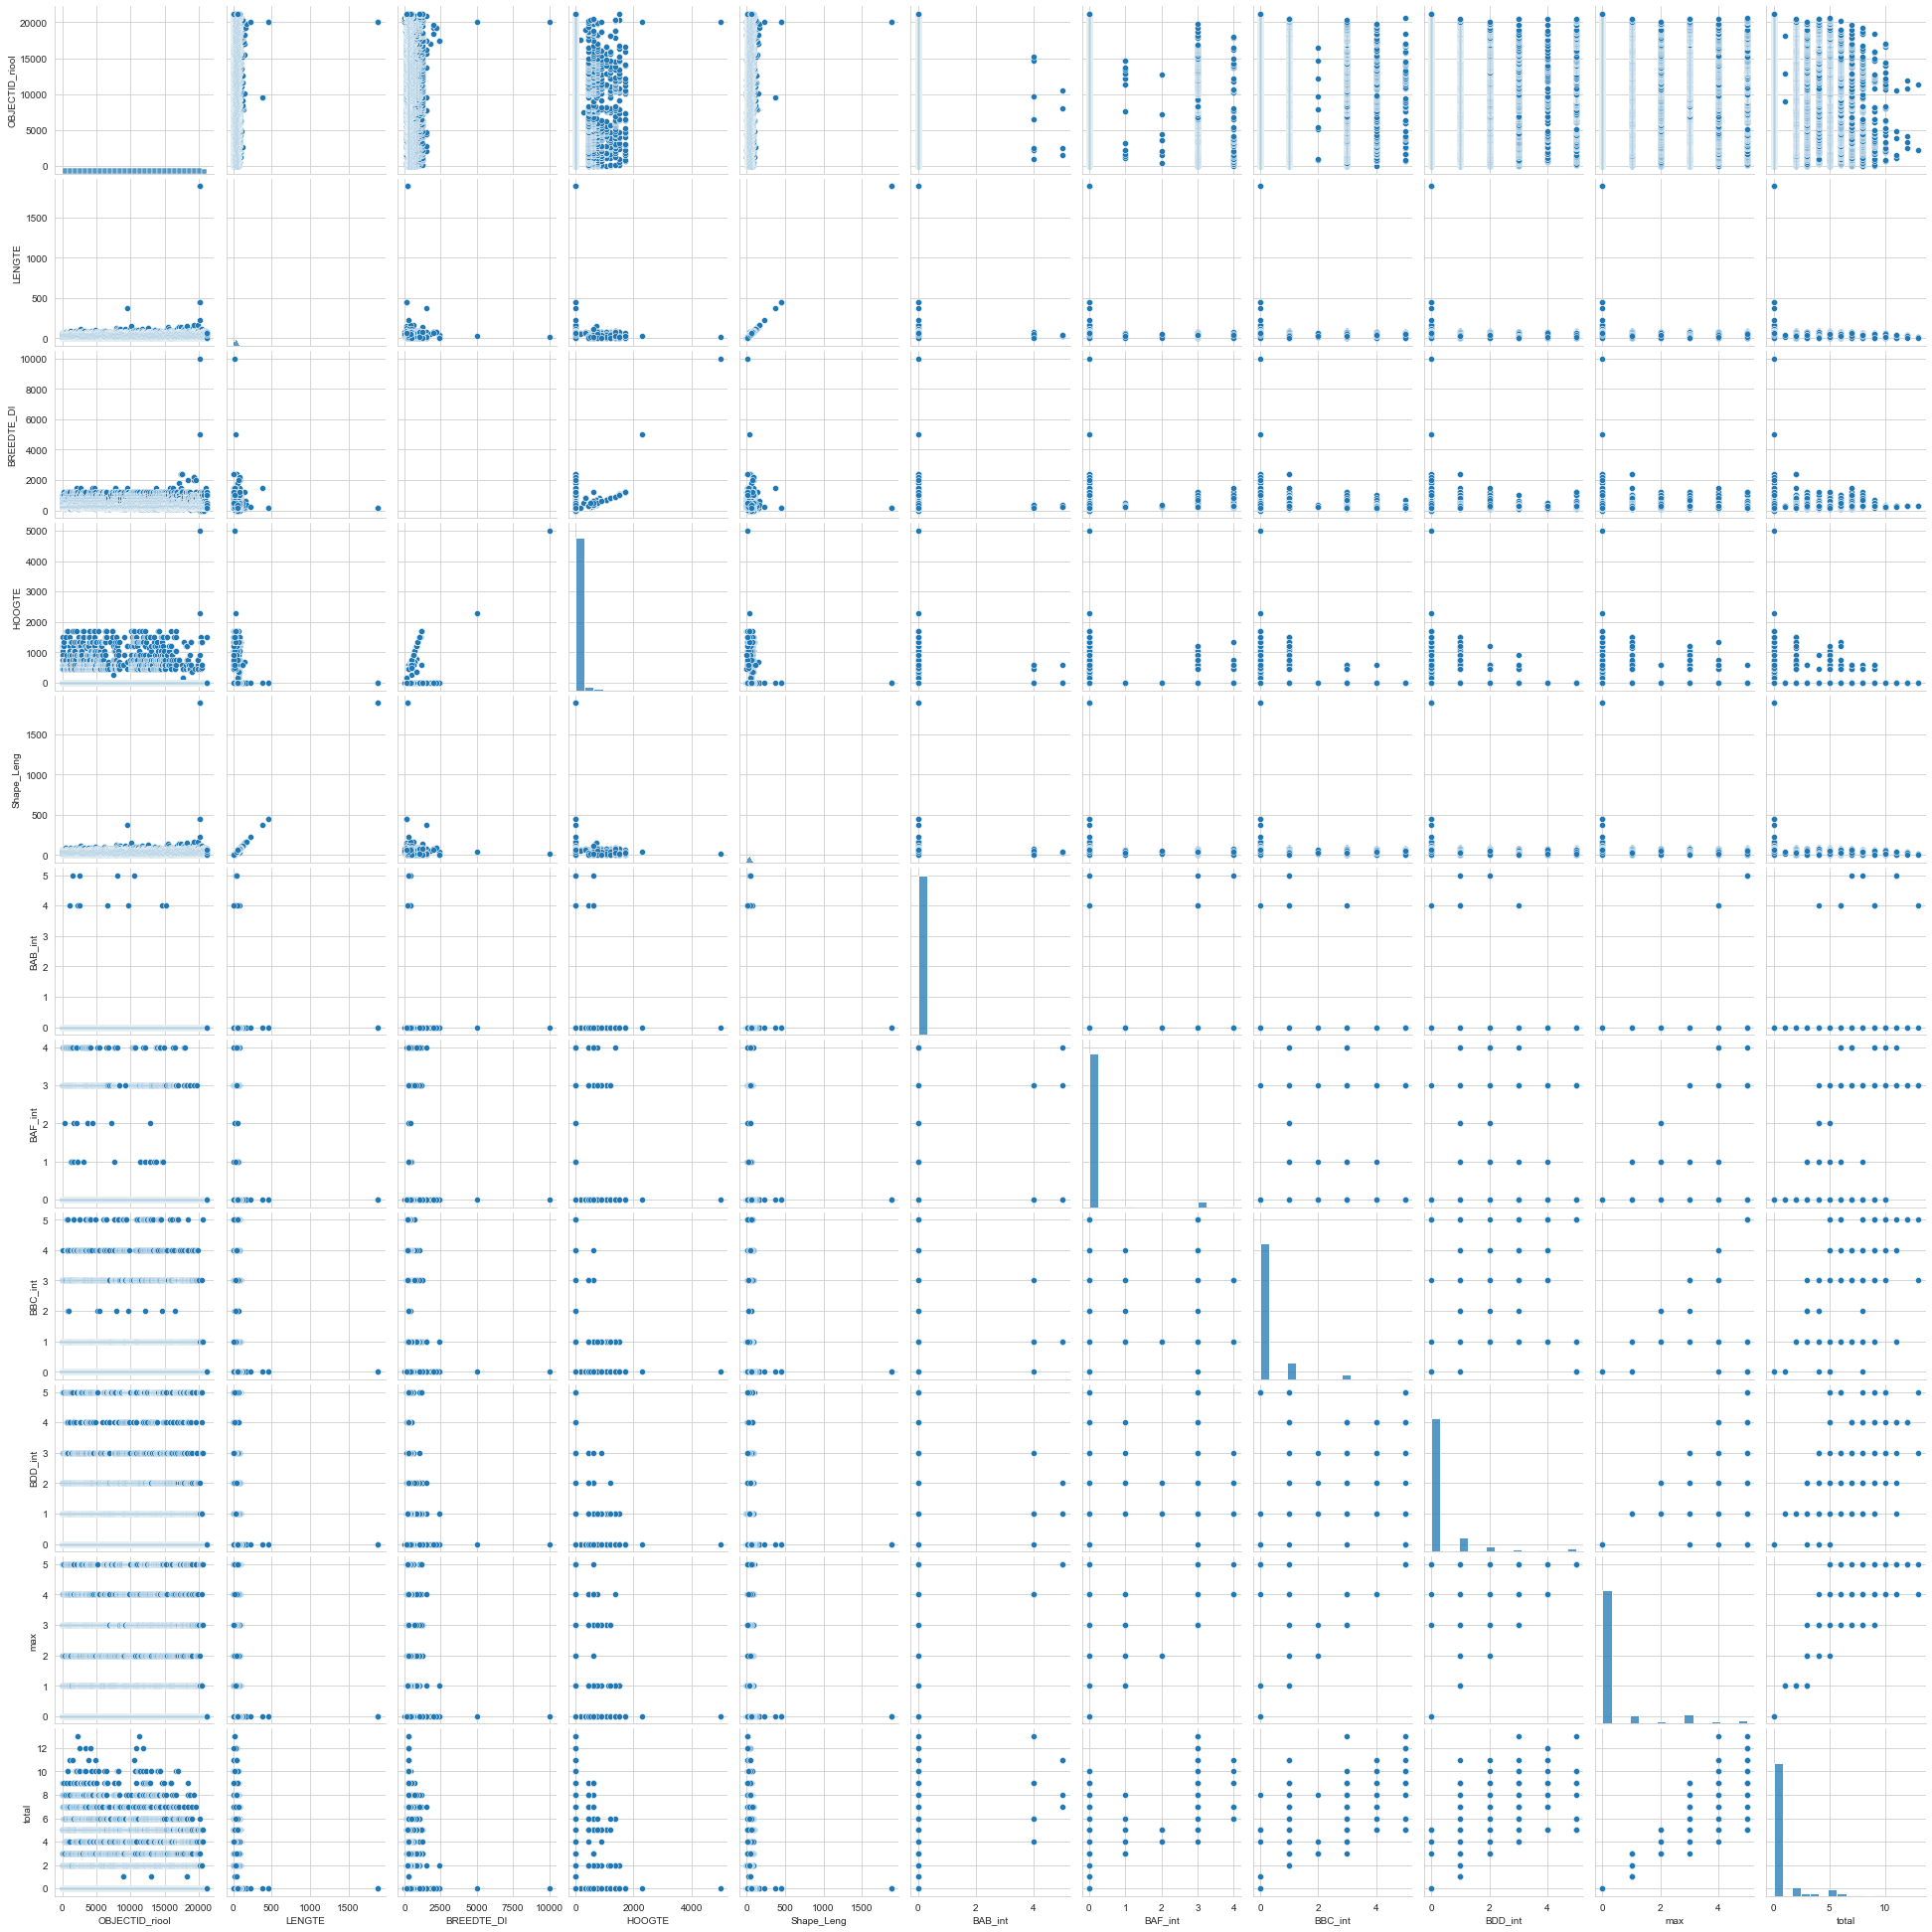

In [16]:
sns.pairplot(df_riolering_schades_clean)

In [19]:
nums = df_riolering_schades_clean.select_dtypes(include='number')
sns.heatmap(nums, annot=True)

<AxesSubplot:>

Error in callback <function flush_figures at 0x7fbf9d1e8280> (for post_execute):



KeyboardInterrupt

